In [1]:
import xarray as xr
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import warnings

In [2]:
# !apt-get install -qq libgdal-dev libproj-dev
# #!pip install --no-binary shapely shapely
# !pip install --no-binary shapely shapely --force
# !pip install cartopy
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

In [3]:
warnings.filterwarnings("ignore")# !pip install cdsapi

In [4]:
# import cdsapi
# import os

# c = cdsapi.Client()
# output_folder= '/mnt/102ECBA62ECB8368/Academic journey/ML_HEATWAVE/Data/Test/'
# #Ensure theoutput folder exists
# os.makedirs(output_folder,exist_ok=True)


# c.retrieve(
#     'reanalysis-era5-single-levels',
#     {
#         'product_type': 'reanalysis',
#         'format': 'netcdf',
#         'variable': [
#             '100m_u_component_of_wind', '100m_v_component_of_wind', '10m_u_component_of_wind',
#             '10m_v_component_of_wind', 'surface_pressure',
#         ],
#         'year': '2023',
#         'month': [
#             '06', '07',
#         ],
#         'day': [
#             '01', '02', '03',
#             '04', '05', '06',
#             '07', '08', '09',
#             '10', '11', '12',
#             '13', '14', '15',
#             '16', '17', '18',
#             '19', '20', '21',
#             '22', '23', '24',
#             '25', '26', '27',
#             '28', '29', '30',
#             '31',
#         ],
#         'time': [
#             '00:00', '01:00', '02:00',
#             '03:00', '04:00', '05:00',
#             '06:00', '07:00', '08:00',
#             '09:00', '10:00', '11:00',
#             '12:00', '13:00', '14:00',
#             '15:00', '16:00', '17:00',
#             '18:00', '19:00', '20:00',
#             '21:00', '22:00', '23:00',
#         ],
#         'area': [
#             29, 85, 18,
#             97,
#         ],
#     },
#     os.path.join(output_folder,'sp_u_v.nc')
# )

In [5]:
data_path='/mnt/102ECBA62ECB8368/Academic journey/ML_HEATWAVE/Data/Test/sp_u_v.nc'
ds=xr.open_dataset(data_path)

In [6]:
ds


<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 45, expver: 2, time: 1464)
Coordinates:
  * longitude  (longitude) float32 85.0 85.25 85.5 85.75 ... 96.5 96.75 97.0
  * latitude   (latitude) float32 29.0 28.75 28.5 28.25 ... 18.5 18.25 18.0
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 2023-06-01 ... 2023-07-31T23:00:00
Data variables:
    u100       (time, expver, latitude, longitude) float32 ...
    v100       (time, expver, latitude, longitude) float32 ...
    u10        (time, expver, latitude, longitude) float32 ...
    v10        (time, expver, latitude, longitude) float32 ...
    sp         (time, expver, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-30 09:14:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [7]:
ds.sp.dims

('time', 'expver', 'latitude', 'longitude')

In [8]:
expver_slice=1 
desired_time = '2023-06-15T12:00:00'
surface_pressure=ds.sel(expver=expver_slice,time=desired_time)

In [14]:
surface_pressure

<xarray.Dataset>
Dimensions:    (longitude: 49, latitude: 45)
Coordinates:
  * longitude  (longitude) float32 85.0 85.25 85.5 85.75 ... 96.5 96.75 97.0
  * latitude   (latitude) float32 29.0 28.75 28.5 28.25 ... 18.5 18.25 18.0
    expver     int32 1
    time       datetime64[ns] 2023-06-15T12:00:00
Data variables:
    u100       (latitude, longitude) float32 1.996 1.384 ... -1.922 -0.7814
    v100       (latitude, longitude) float32 3.309 4.164 5.073 ... 3.984 2.855
    u10        (latitude, longitude) float32 1.191 0.6718 ... -1.094 -0.5481
    v10        (latitude, longitude) float32 2.435 2.844 3.435 ... 2.037 1.441
    sp         (latitude, longitude) float32 5.501e+04 5.551e+04 ... 9.687e+04
Attributes:
    Conventions:  CF-1.6
    history:      2023-08-30 09:14:50 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

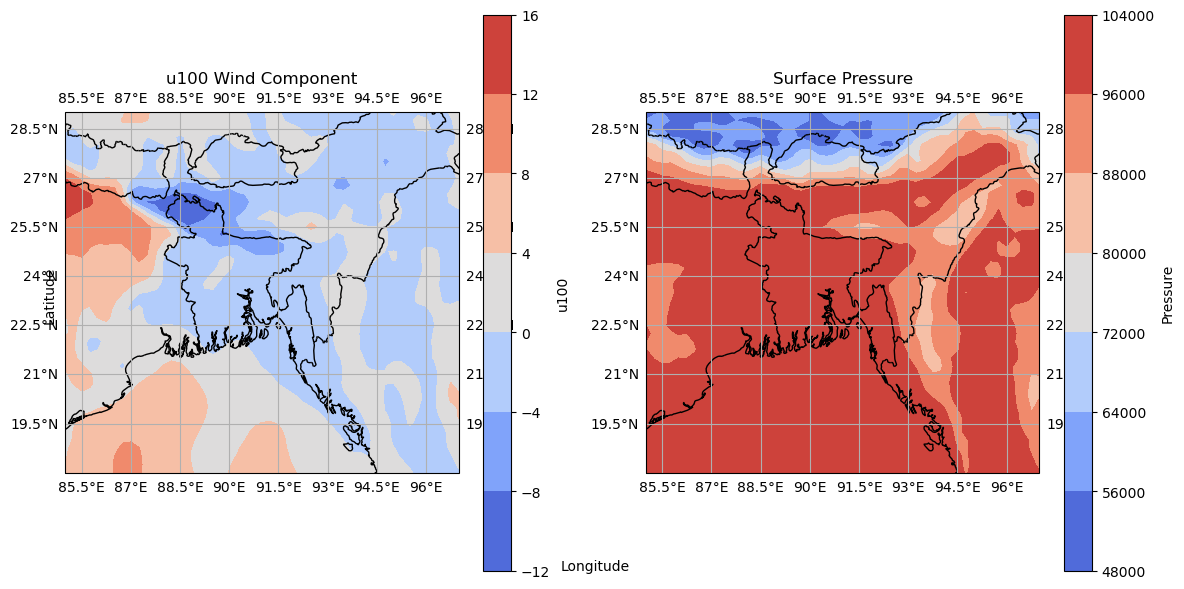

In [10]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Assuming you have the xarray Dataset named 'data'
u100_data = surface_pressure['u100']
sp_data = surface_pressure['sp']

# Get the latitude and longitude values
latitude = u100_data['latitude'].values
longitude = u100_data['longitude'].values

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': projection})

# Plot u100 data using contourf on ax1
contourf1 = ax1.contourf(longitude, latitude, u100_data, transform=projection, cmap='coolwarm')
ax1.set_title('u100 Wind Component')
ax1.coastlines()
ax1.add_feature(cfeature.BORDERS)
ax1.gridlines(draw_labels=True)

# Plot sp data using contourf on ax2
contourf2 = ax2.contourf(longitude, latitude, sp_data, transform=projection, cmap='coolwarm')
ax2.set_title('Surface Pressure')
ax2.coastlines()
ax2.add_feature(cfeature.BORDERS)
ax2.gridlines(draw_labels=True)

# Add colorbars
cbar1 = plt.colorbar(contourf1, ax=ax1, orientation='vertical', pad=0.05, label='u100')
cbar2 = plt.colorbar(contourf2, ax=ax2, orientation='vertical', pad=0.05, label='Pressure')

# Set common labels
fig.text(0.5, 0.04, 'Longitude', ha='center')
fig.text(0.04, 0.5, 'Latitude', va='center', rotation='vertical')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()




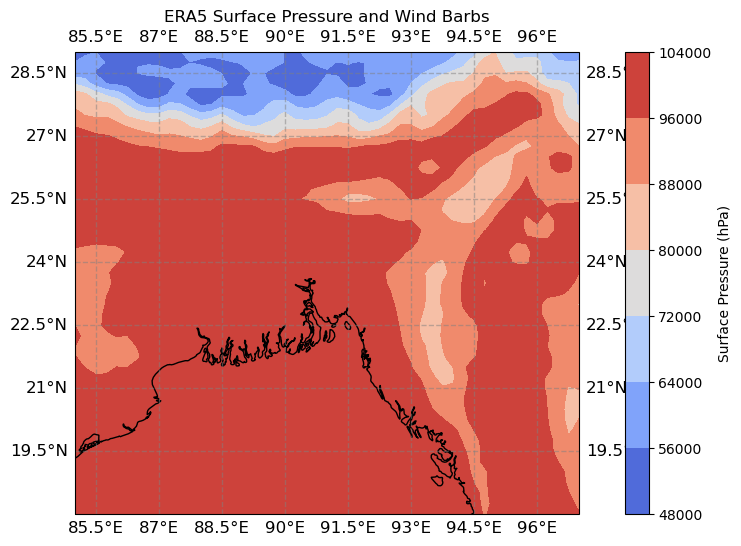

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Example ERA5 data (surface pressure and wind components)
lats = surface_pressure.latitude
lons = surface_pressure.longitude
pressure_data = surface_pressure.sp

# Create a map using Cartopy
fig = plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot surface pressure contours
pressure_contours = plt.contourf(lons, lats, pressure_data, cmap='coolwarm')

# Plot wind barbs
# plt.barbs(lons, lats, u_wind_data, v_wind_data, length=6, linewidth=0.5, color='black')

# Add coastlines, gridlines, and labels
ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 12}
gl.ylabel_style = {'size': 12}

# Add colorbar
cbar = plt.colorbar(pressure_contours, ax=ax, orientation='vertical')
cbar.set_label('Surface Pressure (hPa)')

plt.title('ERA5 Surface Pressure and Wind Barbs')

plt.show()


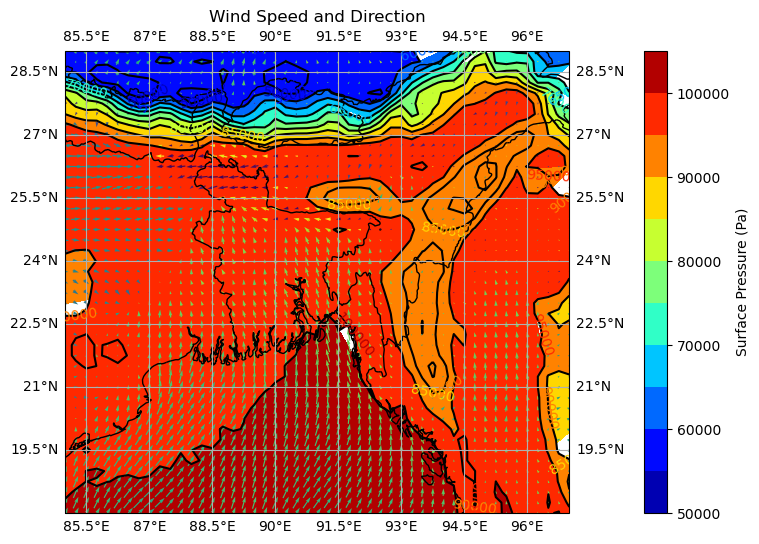

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap

warnings.filterwarnings("ignore")
# Get the latitude and longitude values
latitude = surface_pressure['latitude'].values
longitude = surface_pressure['longitude'].values
# Get the values of u10,v10,and sp.

u10_data = surface_pressure.u10
v10_data = surface_pressure.v10
pressure_data = surface_pressure.sp

# Calculate wind speed and direction
wind_speed = np.sqrt(u10_data**2 + v10_data**2)
wind_direction = np.arctan2(v10_data, u10_data) * (180 / np.pi)

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(12, 6))

# Plot wind speed using contourf
contourf = ax.contourf(longitude, latitude, pressure_data, levels=10, cmap=get_cmap("jet"),transform=projection)
contour = ax.contour(longitude, latitude, pressure_data, levels=10, colors='black', transform=projection)
# Plot wind direction using quiver
quiver = ax.quiver(longitude, latitude, u10_data, v10_data, wind_direction, transform=projection, pivot='middle', color='black')

# Add colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.08, label='Surface Pressure (Pa)')

# Set title and labels
ax.set_title('Wind Speed and Direction')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Label the pressure levels on the contours

plt.clabel(contourf, inline=1, fontsize=10, fmt='%1.0f')



# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()

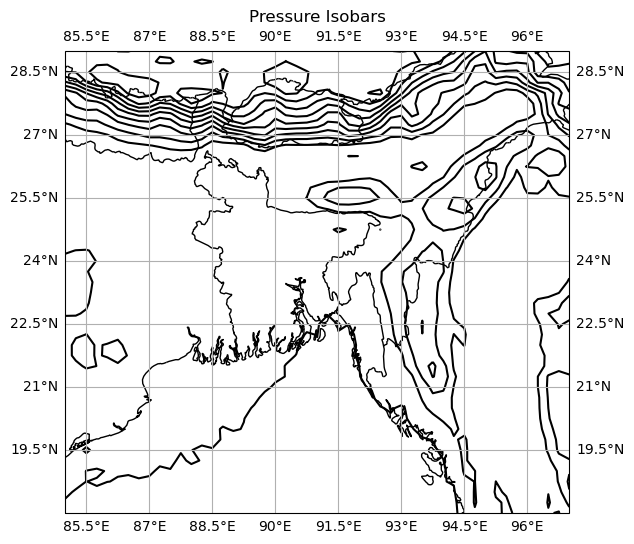

In [13]:
pressure_data = surface_pressure['sp']

# Get the latitude and longitude values
latitude = pressure_data['latitude'].values
longitude = pressure_data['longitude'].values

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(10, 6))

# Plot pressure isobars using contour
contour = ax.contour(longitude, latitude, pressure_data, levels=10, colors='black', transform=projection)

# Label the pressure levels on the contours
# plt.clabel(contour, inline=1, fontsize=10, fmt='%1.0f')

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Set title and labels
ax.set_title('Pressure Isobars')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [18]:
import pandas as pd
import numpy as np

sp=np.array(surface_pressure.sp)
u10=np.array(surface_pressure.u10)
v10=np.array(surface_pressure.v10)
latitude=surface_pressure['latitude'].values
longitude=surface_pressure['longitude'].values

reshaped_sp=sp.reshape(-1)
reshaped_u10=u10.reshape(-1)
reshaped_v10=v10.reshape(-1)

df = pd.DataFrame({
    'latitude': np.repeat(latitude, len(longitude)),
    'longitude': np.tile(longitude, len(latitude)),
    'sp': reshaped_sp,
    'u10': reshaped_u10,
    'v10': reshaped_v10
})




In [19]:
df

,latitude,longitude,sp,u10,v10
0,29.0,85.00,55012.375000,1.191241,2.434555
1,29.0,85.25,55506.203125,0.671841,2.844354
2,29.0,85.50,55982.367188,1.374785,3.435182
3,29.0,85.75,55993.121094,1.822113,3.359084
4,29.0,86.00,55572.250000,1.975387,3.388389
...,...,...,...,...,...
2200,18.0,96.00,98998.460938,-0.711945,1.409822
2201,18.0,96.25,98463.156250,-0.703296,1.740213
2202,18.0,96.50,99822.531250,-0.901735,2.133469
2203,18.0,96.75,100176.578125,-1.093928,2.037045


In [20]:
sp_array=np.array(surface_pressure['sp'])
latitude=surface_pressure['latitude'].values
longitude=surface_pressure['longitude'].values
sp_df=pd.DataFrame(sp_array,index=latitude,columns=longitude)
sp_df


,85.00,85.25,85.50,85.75,86.00,86.25,86.50,86.75,87.00,87.25,...,94.75,95.00,95.25,95.50,95.75,96.00,96.25,96.50,96.75,97.00
29.00,55012.375000,55506.203125,55982.367188,55993.121094,55572.250000,54973.207031,54956.312500,55197.464844,55773.468750,55377.179688,...,74949.078125,79901.187500,73657.289062,70420.140625,69121.437500,68738.203125,64373.617188,62870.625000,62495.070312,61190.992188
28.75,56056.097656,56969.257812,56983.082031,55792.671875,55557.660156,55844.125000,55941.664062,55760.414062,55505.437500,54688.273438,...,83515.429688,84266.539062,74251.726562,73035.203125,74323.148438,74705.617188,66642.312500,64271.472656,64181.613281,64523.378906
28.50,60112.710938,59740.226562,55545.375000,53520.136719,53663.753906,54816.531250,56077.601562,56918.570312,56993.066406,56745.000000,...,86941.515625,87238.734375,79863.554688,80971.023438,80991.757812,76219.359375,66967.179688,65751.421875,66260.609375,66878.085938
28.25,70944.687500,67486.351562,60397.640625,55684.382812,54324.242188,53384.199219,52650.750000,52796.671875,53720.585938,55183.640625,...,89070.429688,90345.320312,88793.179688,90448.234375,88497.492188,81674.515625,74725.585938,74874.578125,72157.367188,67837.328125
28.00,84079.148438,80625.421875,74828.500000,70106.023438,67209.101562,61122.640625,54217.488281,52063.226562,53034.757812,56303.394531,...,91602.546875,92678.531250,95312.023438,97411.757812,97421.742188,93130.117188,88830.039062,83151.398438,76849.125000,70242.726562
27.75,86771.015625,83802.664062,82426.398438,82236.703125,78004.210938,71319.476562,64101.742188,59327.039062,60412.234375,65686.140625,...,94926.484375,96375.718750,97945.523438,99091.390625,98228.148438,98008.500000,92699.265625,83418.664062,74630.351562,71397.046875
27.50,89925.218750,87701.070312,86574.406250,87055.179688,84578.351562,78644.726562,76278.500000,73445.320312,73498.312500,77319.148438,...,97887.156250,98421.687500,99321.023438,98544.562500,97983.156250,97277.359375,94097.039062,84614.453125,78776.054688,78667.000000
27.25,95745.179688,94088.585938,92274.554688,91750.007812,89447.523438,87170.375000,84849.460938,83343.398438,82338.078125,84824.117188,...,98889.406250,99164.351562,97749.679688,96886.437500,93906.570312,92523.390625,91895.156250,89586.531250,83666.726562,80208.390625
27.00,98148.273438,98286.515625,97068.453125,96313.507812,95228.312500,92945.023438,91655.539062,90109.539062,88539.734375,88788.570312,...,98624.437500,96739.750000,95321.242188,91685.492188,88424.531250,88207.187500,91027.312500,90001.250000,87982.164062,84517.679688
26.75,98088.375000,98306.484375,98432.437500,98281.140625,97765.039062,97465.515625,96254.367188,95890.335938,95203.734375,94402.703125,...,96334.242188,93488.007812,90704.750000,86873.156250,86991.429688,88708.695312,92469.625000,94076.296875,92262.265625,87999.062500


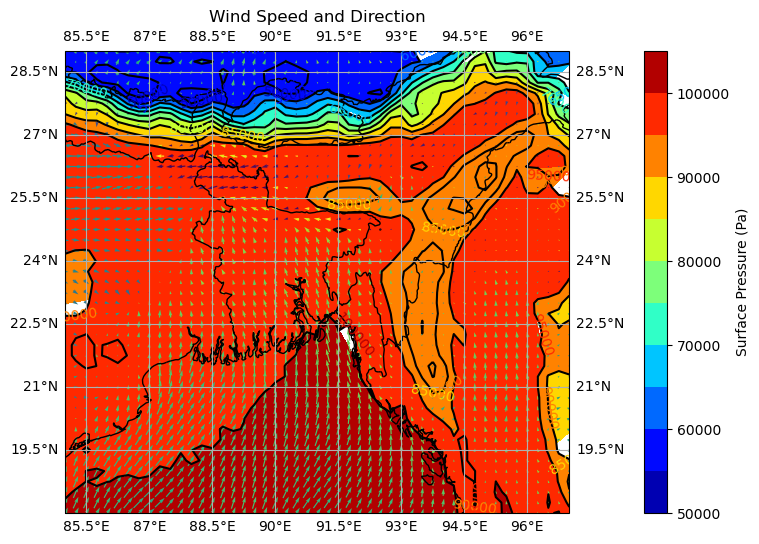

In [22]:
latitude=df['latitude'].unique()
longitude=df['longitude'].unique()
sp_array=df['sp'].values.reshape(len(latitude),len(longitude))
u10_array=df['u10'].values.reshape(len(latitude),len(longitude))
v10_array=df['v10'].values.reshape(len(latitude),len(longitude))

# Create a Cartopy PlateCarree projection
projection = ccrs.PlateCarree()

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': projection}, figsize=(12, 6))

# Plot wind speed using contourf
contourf = ax.contourf(longitude, latitude, sp_array, levels=10, cmap=get_cmap("jet"),transform=projection)
contour = ax.contour(longitude, latitude, sp_array, levels=10, colors='black', transform=projection)
# Plot wind direction using quiver
quiver = ax.quiver(longitude, latitude, u10_array, v10_array, wind_direction, transform=projection, pivot='middle', color='black')

# Add colorbar
cbar = plt.colorbar(contourf, ax=ax, orientation='vertical', pad=0.08, label='Surface Pressure (Pa)')

# Set title and labels
ax.set_title('Wind Speed and Direction')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Label the pressure levels on the contours

plt.clabel(contourf, inline=1, fontsize=10, fmt='%1.0f')



# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.gridlines(draw_labels=True)

# Show the plot
plt.show()